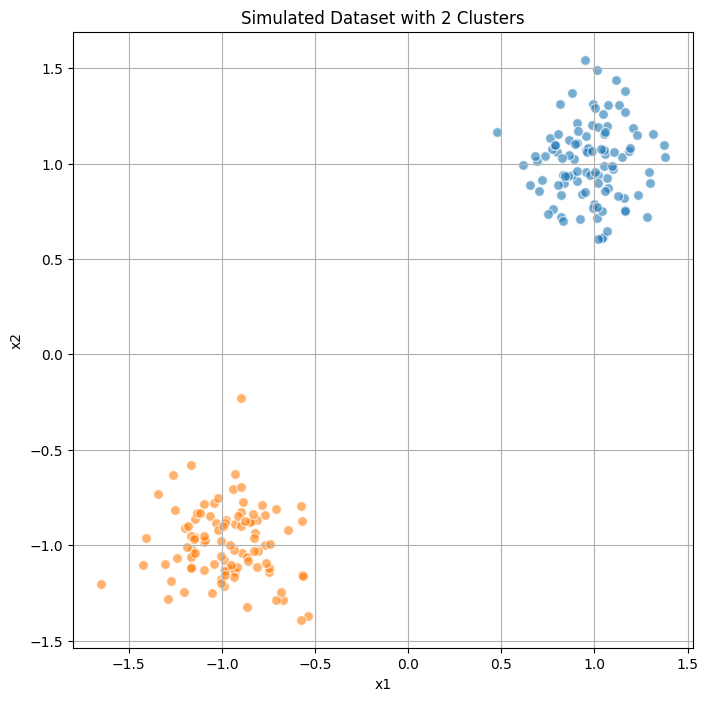

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_points_per_cluster = 100
cluster_std = 0.2  # Standard deviation of the clusters

centers = np.array([
    [1, 1],
    [-1, -1],
])

# Generate data
def generate_cluster(center, num_points, std_dev):
    return center + std_dev * np.random.randn(num_points, 2)

# Create the dataset
x = np.vstack([
    generate_cluster(centers[0], num_points_per_cluster, cluster_std),
    generate_cluster(centers[1], num_points_per_cluster, cluster_std),
])

y = np.array([0] * num_points_per_cluster + [1] * num_points_per_cluster)
plt.figure(figsize=(8, 8))
plt.scatter(x[y == 0, 0], x[y==0, 1], alpha=0.6, edgecolors='w', s=50)
plt.scatter(x[y == 1, 0], x[y==1, 1], alpha=0.6, edgecolors='w', s=50)
plt.title('Simulated Dataset with 2 Clusters')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [3]:
print(x.shape)
print(x)

(200, 2)
[[ 1.09934283  0.97234714]
 [ 1.12953771  1.30460597]
 [ 0.95316933  0.95317261]
 [ 1.31584256  1.15348695]
 [ 0.90610512  1.10851201]
 [ 0.90731646  0.90685405]
 [ 1.04839245  0.61734395]
 [ 0.65501643  0.88754249]
 [ 0.79743378  1.06284947]
 [ 0.81839518  0.71753926]
 [ 1.29312975  0.95484474]
 [ 1.01350564  0.71505036]
 [ 0.89112346  1.02218452]
 [ 0.76980128  1.0751396 ]
 [ 0.87987226  0.94166125]
 [ 0.87965868  1.37045564]
 [ 0.99730056  0.78845781]
 [ 1.16450898  0.75583127]
 [ 1.04177272  0.60806598]
 [ 0.73436279  1.03937225]
 [ 1.14769332  1.03427366]
 [ 0.97687034  0.93977926]
 [ 0.7042956   0.85603116]
 [ 0.90787225  1.21142445]
 [ 1.06872366  0.64739197]
 [ 1.06481679  0.92298354]
 [ 0.8646156   1.12233526]
 [ 1.2061999   1.18625602]
 [ 0.8321565   0.93815752]
 [ 1.06625269  1.19510903]
 [ 0.90416515  0.9628682 ]
 [ 0.77873301  0.76075868]
 [ 1.16250516  1.27124801]
 [ 0.98559798  1.20070658]
 [ 1.07232721  0.87097605]
 [ 1.07227912  1.30760731]
 [ 0.99283479  1.31

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression()

In [6]:
# sigmoid(a1 x1 + a2 x2 + b) ~ y
print('a1, a2', clf.coef_)
print('b: ', clf.intercept_)
# sigmoid(-2.2 * x1 + -2.3 * x2 + 0.02) ~ y

a1, a2 [[-2.28502608 -2.30932914]]
b:  [0.02732113]


(-1.6, 1.6)

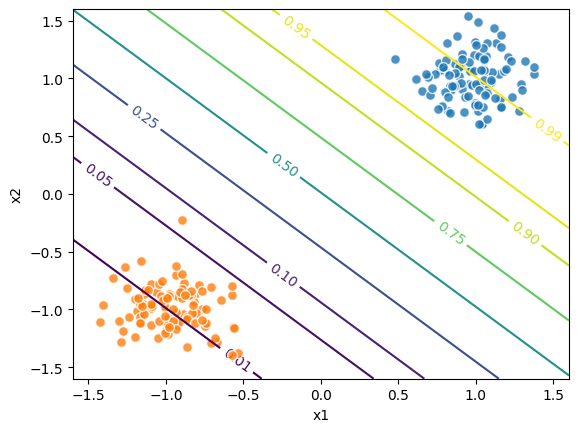

In [7]:
import numpy as np

xx1, xx2 = np.meshgrid(np.linspace(-1.6, 1.6, 161), np.linspace(-1.6, 1.6, 161))
XX = np.stack([xx1.flatten(), xx2.flatten()]).T
y_grid = clf.predict_proba(XX)[:, 0].reshape(xx1.shape)

CS = plt.contour(xx1, xx2, y_grid, [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, ])
plt.clabel(CS, inline=1, fontsize=10, zorder=0)
plt.scatter(x[y == 0, 0], x[y==0, 1], alpha=0.8, edgecolors='w', s=50)
plt.scatter(x[y == 1, 0], x[y==1, 1], alpha=0.8, edgecolors='w', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-1.6, 1.6])
plt.ylim([-1.6, 1.6])
#plt.plot(3, 10, 'kx', markersize=10)

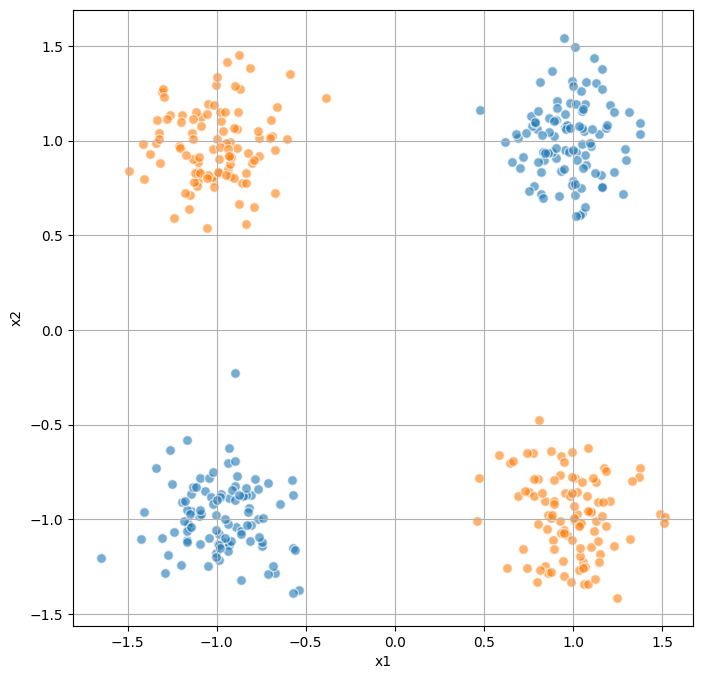

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_points_per_cluster = 100
cluster_std = 0.2  # Standard deviation of the clusters

# Define cluster centers
centers = np.array([
    [1, 1],
    [-1, -1],
    [-1, 1],
    [1, -1]
])

# Generate data
def generate_cluster(center, num_points, std_dev):
    return center + std_dev * np.random.randn(num_points, 2)

# Create the dataset
x = np.vstack([
    generate_cluster(centers[0], num_points_per_cluster, cluster_std),
    generate_cluster(centers[1], num_points_per_cluster, cluster_std),
    generate_cluster(centers[2], num_points_per_cluster, cluster_std),
    generate_cluster(centers[3], num_points_per_cluster, cluster_std)
])

y = np.array([0] * (2 * num_points_per_cluster) + [1] * (2 * num_points_per_cluster))
plt.figure(figsize=(8, 8))
plt.scatter(x[y == 0, 0], x[y==0, 1], alpha=0.6, edgecolors='w', s=50)
plt.scatter(x[y == 1, 0], x[y==1, 1], alpha=0.6, edgecolors='w', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

(-1.6, 1.6)

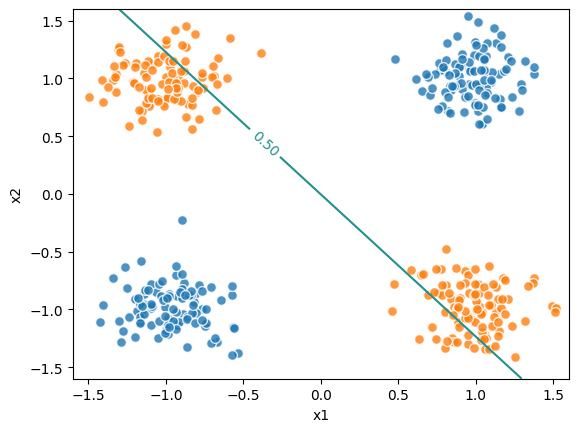

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x, y)

xx1, xx2 = np.meshgrid(np.linspace(-1.6, 1.6, 161), np.linspace(-1.6, 1.6, 161))
XX = np.stack([xx1.flatten(), xx2.flatten()]).T
y_grid = clf.predict_proba(XX)[:, 0].reshape(xx1.shape)

CS = plt.contour(xx1, xx2, y_grid, [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, ])
plt.clabel(CS, inline=1, fontsize=10, zorder=0)
plt.scatter(x[y == 0, 0], x[y==0, 1], alpha=0.8, edgecolors='w', s=50)
plt.scatter(x[y == 1, 0], x[y==1, 1], alpha=0.8, edgecolors='w', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-1.6, 1.6])
plt.ylim([-1.6, 1.6])
#plt.plot(3, 10, 'kx', markersize=10)

(-1.6, 1.6)

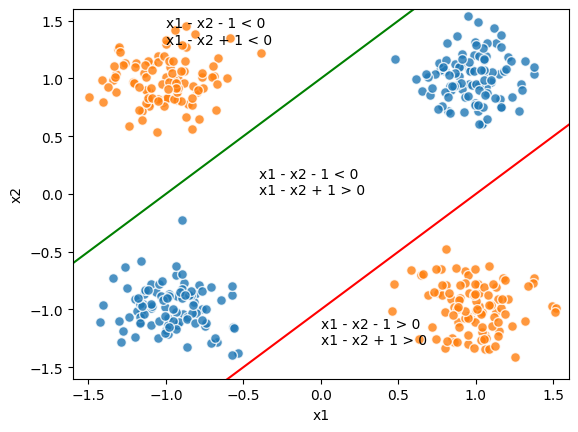

In [10]:
a, b = 1, -1
xx1 = np.linspace(-1.6, 1.6, 11)
xx2 = a * xx1 + b

plt.plot(xx1, xx2, 'r')

a, b = 1, 1
xx1 = np.linspace(-1.6, 1.6, 11)
xx2 = a * xx1 + b

plt.plot(xx1, xx2, 'g')
plt.text(-1, 1.3, 'x1 - x2 - 1 < 0\nx1 - x2 + 1 < 0')
plt.text(-0.4, 0., 'x1 - x2 - 1 < 0\nx1 - x2 + 1 > 0')
plt.text(0.0, -1.3, 'x1 - x2 - 1 > 0\nx1 - x2 + 1 > 0')
plt.scatter(x[y == 0, 0], x[y==0, 1], alpha=0.8, edgecolors='w', s=50)
plt.scatter(x[y == 1, 0], x[y==1, 1], alpha=0.8, edgecolors='w', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-1.6, 1.6])
plt.ylim([-1.6, 1.6])

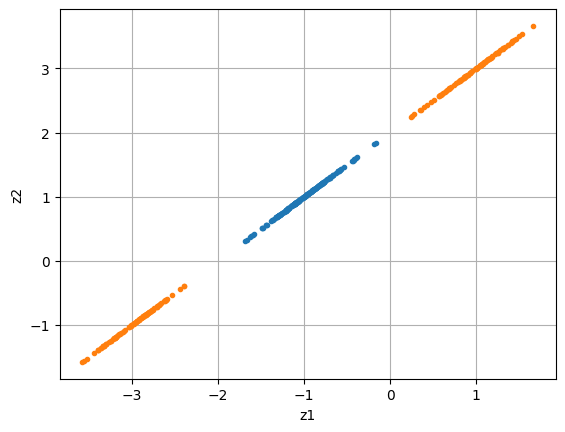

In [12]:
z1 = x[:, 0] - x[:, 1] - 1
z2 = x[:, 0] - x[:, 1] + 1
plt.plot(z1[y == 0], z2[y == 0], '.')
plt.plot(z1[y == 1], z2[y == 1], '.')
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid('on')

In [13]:
np.all(((z1 > 0) + (z2 < 0)).astype('int') == y)

True

In [26]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
y_ = sigmoid(sigmoid(z1) - sigmoid(z2) + 0.35)

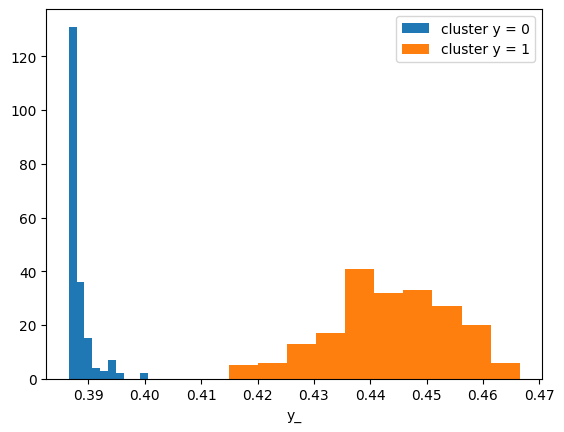

In [28]:
plt.hist(y_[y == 0], label = 'cluster y = 0')
plt.hist(y_[y == 1], label = 'cluster y = 1')
plt.xlabel('y_')
plt.legend()
plt.show()

In [ ]:
z1 = x[:, 0] - x[:, 1] - 1
z2 = x[:, 0] - x[:, 1] + 1
y_ = sigmoid(sigmoid(z1) - sigmoid(z2) + 0.35)

## 2-layer neural network can classify XOR data

z1 = sigmoid(x1 - x2 - 1)

z2 = sigmoid(x1 - x2 + 1)

y_ = sigmoid(z1 - z2 + 0.35)

![two-layer nn](./resource/2-layer-nn.png)